<img src="https://raw.githubusercontent.com/DianaMoyano1/Python_EDAs/main/Images/LogoVector.jpeg" width="200"/>

 # DaRMoD - Tutorial 4 - Introduction to Computer Vision


## Welcome to the Week 4 Tutorial!

This program is offered by the <font color="#EC008C"> **Vector Institute** </font> for professionals who wish to explore some of the concepts discussed during the theory section.



<center>
<b><font color="#EC008C">!!! Make sure you make a copy of this notebook before running any script !!!</font></b>
<br>
<img src="https://raw.githubusercontent.com/DianaMoyano1/Python_EDAs/main/Images/ColabSave.png" width="200"/>
</center>

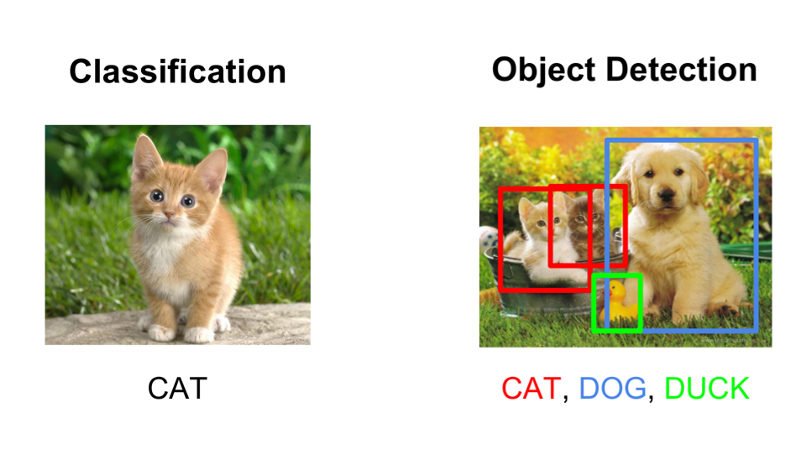

[Source](https://www.datacamp.com/tutorial/object-detection-guide)

# Object Classification

## Import libs


```
numpy  -> numerical operations
plt    -> visualizaiton
sns    -> visualizaiton
PIL    -> loading image
glob   -> looping through data repo
cv2    -> processing images
json   -> reading annotations
pd     -> grouping annotations
```

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import cv2
from typing import Tuple
import json
import pandas as pd
import matplotlib.patches as patches

# Inroduction to TensorFlow

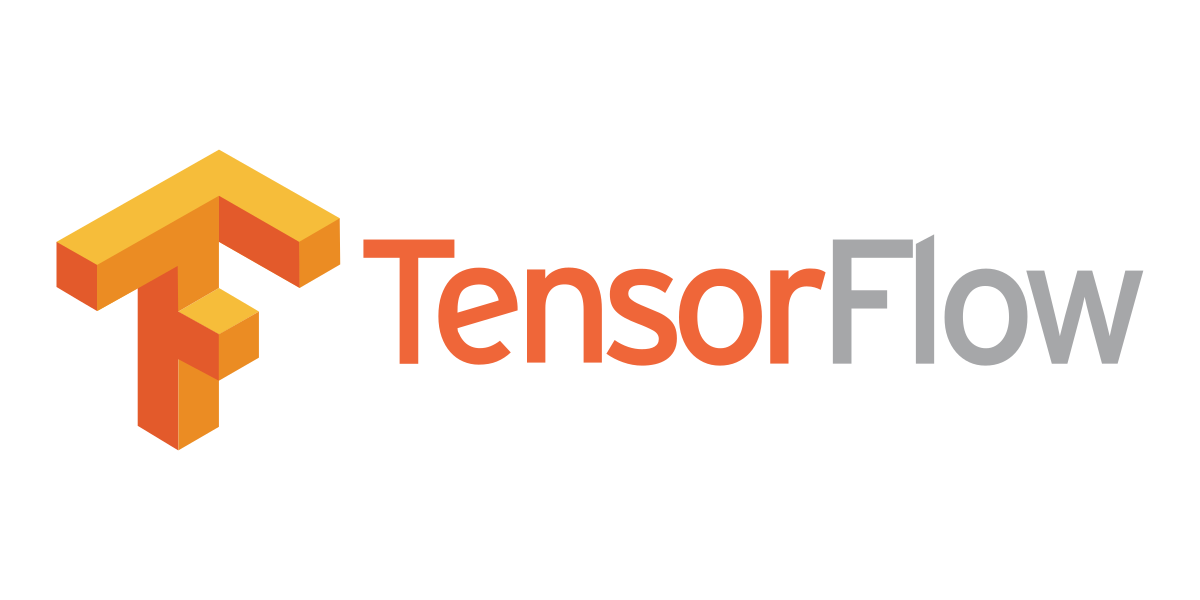

TensorFlow (TF) is one of the most popular library for any tasks related to deep learning and computer vision. TF's main objective is for creating and building neural networks. Furthermore, it has support for reading in and preprocessing images as well.

Keras is an open-source neural network library written in Python. It was developed with a focus on enabling fast experimentation with deep neural networks, and it operates as a high-level easy to use neural networks API.

The relationship between Keras and TensorFlow is that Keras can run on top of TensorFlow. Initially, Keras was developed as an independent project to provide a simpler, more user-friendly interface for building and training deep learning models.

In TensorFlow 2.0 and later versions, Keras has been integrated more tightly and serves as TensorFlow's official high-level API, making it the preferred way to create and train TensorFlow models. This integration means that when you are using Keras, you are also using TensorFlow to handle the heavy lifting in the background, benefiting from its powerful features for computation and execution.

In [3]:
import tensorflow as tf

## Fashion MNIST Dataset

Fashion MNIST is a popular dataset containing 60,000 images of clothing items.

The ten classes are:

*	T-shirt/top
*	Trouser
*	Pullover
*	Dress
*	Coat
*	Sandal
*	Shirt
*	Sneaker
*	Bag
*	Ankle boot

In [32]:
# The fashion MNIST dataset is apart of the TF library
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
# Define the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
# Similar to the original MNIST dataset, the images are 28x28
test_images.shape

(10000, 28, 28)

In [35]:
# Look at the pixel values for first image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [36]:
# Neural networks typically converge faster with inputs that are on a smaller scale.
# Large input values can cause large errors in the initial stages of training.

# Divide inputs by 255 to normalize values
train_images = train_images / 255.0

test_images = test_images / 255.0

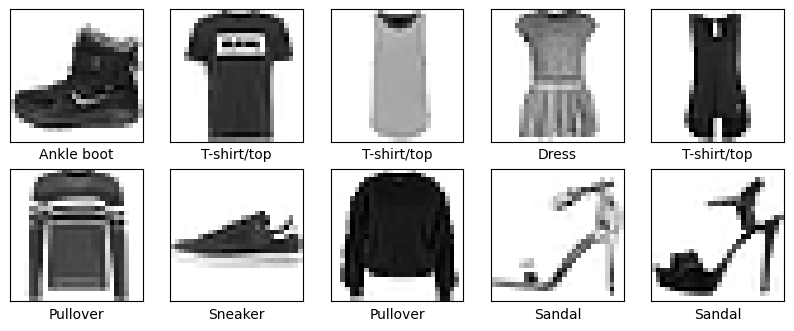

In [37]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Convolutional Neural Networks (CNN)

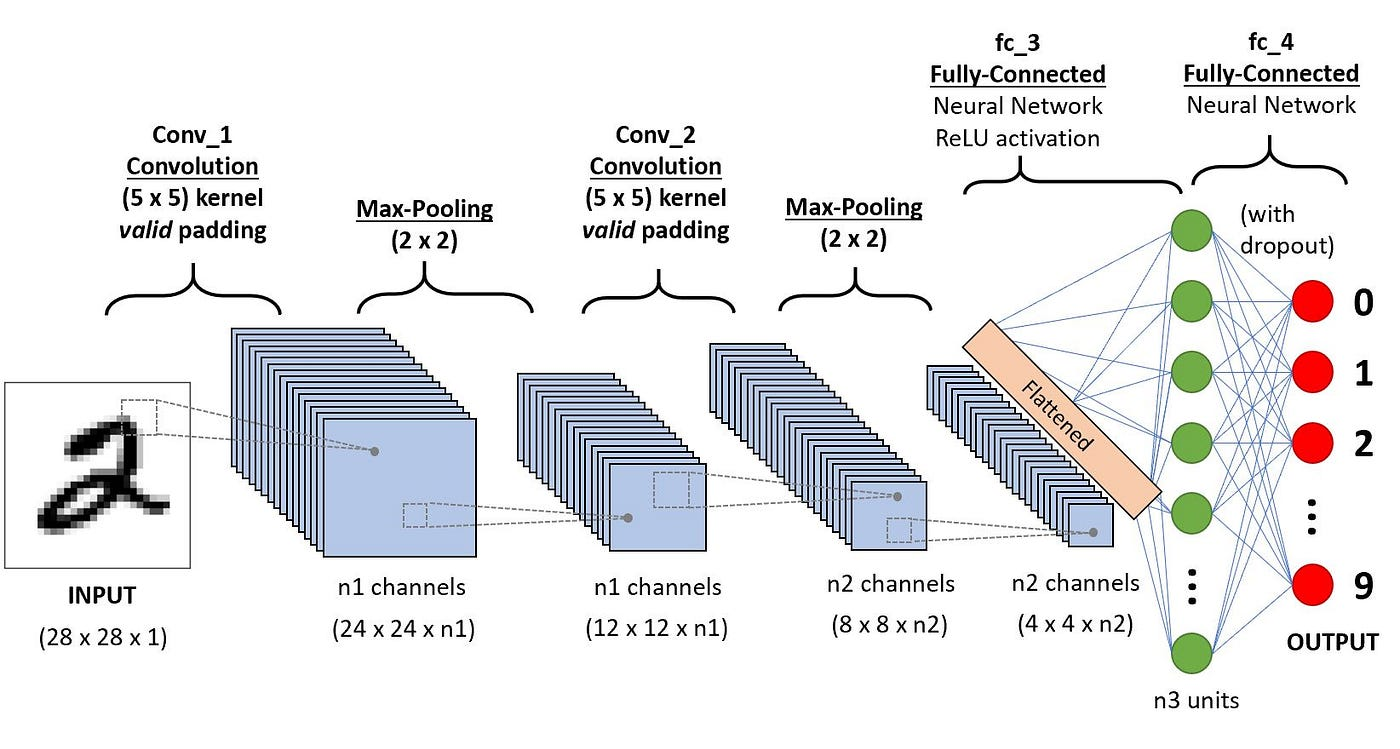



[Source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

**Layers in TensorFlow**


*   **Convolutional Layers (Conv2D)**: It applies a convolution operation to the input, passing the result to the next layer. This layer helps the network learn filters that activate when they see some specific types of features at a given spatial position in the input.
    * **Activation Function:** A non-linear activation function is applied in each Conv2D layer. The most common one is the Rectified Linear Unit (ReLU) as it speeds up training and reduces the risk of the vanishing gradient problem.

*   **Pooling Layers (MaxPooling2D):** Reduces the spatial dimensions (height, width) of the input volume. It does so by downsampling the input - for each region in the input, it outputs the maximum value.
* **Dropout Layers:** Used to prevent overfitting in the network by randomly setting a fraction of input units to 0 at each update during training time.

* **Flatten Layers:** A utility layer that reshapes the multi-dimensional output of the last pooling or convolutional layer into a one-dimensional array so that it can be fed into the subsequent dense layers.

* **Fully Connected Layer**  CNN architectures typically include one or more dense layers to perform classification based on the features extracted by the convolutional layers.



In [38]:
# Build initial model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
# Print summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [40]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Fit model on the training set
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4627 - accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3047 - accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2316 - accuracy: 0.9146
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2083 - accuracy: 0.9235
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1868 - accuracy: 0.9299
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1717 - accuracy: 0.9357
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1542 - accuracy: 0.9424
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9474
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.129

In [42]:
# Evaluate model accuracy on test set
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9105


0.9104999899864197

In [43]:
# To make predictions, the predict function can be called
prediction = np.argmax(model.predict(test_images)[10])
class_names[prediction]

313/313 [==============================] - 1s 2ms/step


'Coat'

Text(0.5, 0, 'Coat')

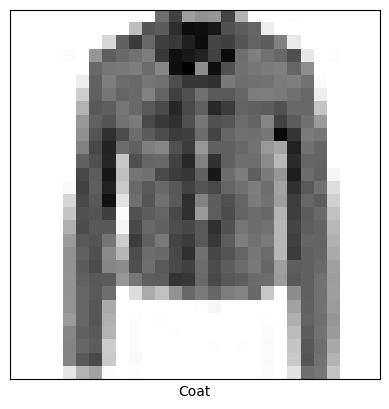

In [44]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[10], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[10]])

# Vertex AI

## Import the Vertex AI SDK

Import the Vertex AI SDK. If running in Colab Enterprise or Vertex Workbench, you can do this without passing any arguments, otherwise you will need to pass the project id and region. See [Vertex AI SDK documentation](https://cloud.google.com/python/docs/reference/aiplatform/latest) for more details.

In [45]:
from google.cloud import aiplatform

aiplatform.init()

## Export the saved model to Google Cloud Storage

Save the model directly to Google Cloud Storage, which is the Object (blob) storage solution on Google Cloud. We are able to import saved models and serve using pre-built containers from the following model types into the Vertex AI Model Registry:


* TensorFlow (e.g. `tf.model.save`)
* Pytorch (using PyTorch model archiver with `*.mar` file format)
* XGBoost (e.g. `xgboost.Booster.save_model` with `*.bst` file format)
* scikit-learn (e.g. using `joblib` to export a `*.joblib` file format)

See the [link](https://cloud.google.com/vertex-ai/docs/training/exporting-model-artifacts) for more details on prebuilt containers for common model formats. You are also able to use a custom container for models not in the above formats, see [the docs](https://cloud.google.com/vertex-ai/docs/predictions/custom-container-requirements) for more information.



In [46]:
from datetime import datetime
bucket_name = "jkwng-vertex-experiments"
model_prefix = "fashion_mnist_model"

We will save the trained model to GCS with the current timestamp to version it. This way we know when we trained the model and can track its performance.

In [47]:
# save the model to GCS with timestamp
datestamp = datetime.now().strftime("%Y%m%d%H%M%S")
GCS_URI = f"gs://{bucket_name}/models/{model_prefix}_{datestamp}"
model.save(GCS_URI)

print(f"Saved model to gs://{bucket_name}/models/{model_prefix}_{datestamp}")

Saved model to gs://jkwng-vertex-experiments/models/fashion_mnist_model_20240313011235


Print out the contents of the model we just saved using the [Cloud Storage SDK](https://cloud.google.com/storage/docs/reference/libraries).

In [48]:
from google.cloud import storage
from pprint import pprint
#datestamp = "20240312165547"
#GCS_URI = f"gs://{bucket_name}/models/{model_prefix}_{datestamp}"

# list the files in the bucket
storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)
bloblist = bucket.list_blobs(prefix=f"models/{model_prefix}_{datestamp}")
for blob in list(bloblist):
  print(blob.name)


models/fashion_mnist_model_20240313011235/
models/fashion_mnist_model_20240313011235/assets/
models/fashion_mnist_model_20240313011235/fingerprint.pb
models/fashion_mnist_model_20240313011235/keras_metadata.pb
models/fashion_mnist_model_20240313011235/saved_model.pb
models/fashion_mnist_model_20240313011235/variables/
models/fashion_mnist_model_20240313011235/variables/variables.data-00000-of-00001
models/fashion_mnist_model_20240313011235/variables/variables.index


## Load the saved model and examine it

Let's load the saved model and examine the input format it expects.

In [49]:
# load the model from GCS
tf_model = tf.saved_model.load(GCS_URI)
serving_input = tf_model.signatures['serving_default'].structured_input_signature

# hack here - the first keyword arg is what we will pass in our prediction request
serving_input_fn = serving_input[0]
serving_input_name = list(serving_input[1].keys())[0]
serving_input_arg = serving_input[1][serving_input_name]

# print out the input argument
print(f"Serving function input: {serving_input}")
print(f"Serving function input name: {serving_input_name}")
print(f"Serving input arg : {serving_input_arg}")

Serving function input: ((), {'conv2d_4_input': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input')})
Serving function input name: conv2d_4_input
Serving input arg : TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input')


Note that the model expects a keyword argument `conv2d_input` which matches the first input layer in the model we trained above. Also observe the input format, which is a multi-dimensional array of 32-bit floats roughly matching what we used to train the model.

Now let's try to match the version of the Tensorflow serving container to the version of Tensorflow used to train the model.

In [50]:
%pip install semver

from semver import Version

tf_version = Version.parse(tf.__version__)
print(f"Tensorflow version: {tf_version.major}.{tf_version.minor}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Tensorflow version: 2.15
Num GPUs Available:  1


## Publish the saved model to Vertex AI Model Registry

Publish the saved model to the Vertex Model Registry. This will create a new model version in Vertex AI. Note that this does not upload the model anywhere, it just creates metadata about the model.

Since this is a Tensorflow model, we will use the pre-built Tensorflow serving container to serve predictions. You can view all of the pre-built container images [here](https://cloud.google.com/vertex-ai/docs/predictions/pre-built-containers).

In [51]:
from platform import version
import google.api_core.exceptions

vertex_model = None

# Publish the model to the Vertex Model Registry
try:
  vertex_model = aiplatform.Model(model_name=f"{model_prefix}")

  pprint(f"Model: {vertex_model.to_dict()}")

  # publish new version
  vertex_model = vertex_model.upload(
      display_name=f"{model_prefix}",
      version_aliases=[f"v{datestamp}"],
      parent_model=f"{model_prefix}",
      artifact_uri=GCS_URI,
      serving_container_image_uri=f"us-docker.pkg.dev/vertex-ai-restricted/prediction/tf_opt-gpu.{tf_version.major}-{tf_version.minor}:latest",
  )
except google.api_core.exceptions.NotFound as e:
    print("Model not found. Creating new model...")

    vertex_model = aiplatform.Model.upload(
      display_name=f"{model_prefix}",
      model_id=f"{model_prefix}",
      version_aliases=[f"v{datestamp}"],
      artifact_uri=GCS_URI,
      serving_container_image_uri=f"us-docker.pkg.dev/vertex-ai-restricted/prediction/tf_opt-gpu.{tf_version.major}-{tf_version.minor}:latest"
      #serving_container_image_uri=f"us-docker.pkg.dev/vertex-ai-restricted/prediction/tf_opt-cpu.{tf_version.major}-{tf_version.minor}:latest"
    )

pprint(f"Vertex model: {vertex_model.to_dict()}")

("Model: {'name': "
 "'projects/205512073711/locations/us-central1/models/fashion_mnist_model', "
 "'displayName': 'fashion_mnist_model', 'predictSchemata': {}, 'metadata': "
 "None, 'containerSpec': {'imageUri': "
 "'us-docker.pkg.dev/vertex-ai-restricted/prediction/tf_opt-gpu.2-15:latest'}, "
 "'supportedDeploymentResourcesTypes': ['DEDICATED_RESOURCES', "
 "'SHARED_RESOURCES'], 'supportedInputStorageFormats': ['jsonl', 'bigquery', "
 "'csv', 'tf-record', 'tf-record-gzip', 'file-list'], "
 "'supportedOutputStorageFormats': ['jsonl', 'bigquery'], 'createTime': "
 "'2024-03-12T16:58:33.851813Z', 'updateTime': '2024-03-13T00:51:25.015985Z', "
 "'deployedModels': [{'endpoint': "
 "'projects/205512073711/locations/us-central1/endpoints/4625324843', "
 "'deployedModelId': '8787312322348580864'}], 'etag': "
 "'AMEw9yPZkR9FhjYHgs_g1SwqYtUvMPpOabl1SSK4ovGYFCYRp0jCZaOgKbCXbBWnf6M=', "
 "'supportedExportFormats': [{'id': 'custom-trained', 'exportableContents': "
 "['ARTIFACT']}], 'artifactUri':

INFO:google.cloud.aiplatform.models:Creating Model
INFO:google.cloud.aiplatform.models:Create Model backing LRO: projects/205512073711/locations/us-central1/models/fashion_mnist_model/operations/3464000422551748608
INFO:google.cloud.aiplatform.models:Model created. Resource name: projects/205512073711/locations/us-central1/models/fashion_mnist_model@3
INFO:google.cloud.aiplatform.models:To use this Model in another session:
INFO:google.cloud.aiplatform.models:model = aiplatform.Model('projects/205512073711/locations/us-central1/models/fashion_mnist_model@3')


("Vertex model: {'name': "
 "'projects/205512073711/locations/us-central1/models/fashion_mnist_model@3', "
 "'displayName': 'fashion_mnist_model', 'predictSchemata': {}, 'metadata': "
 "None, 'containerSpec': {'imageUri': "
 "'us-docker.pkg.dev/vertex-ai-restricted/prediction/tf_opt-gpu.2-15:latest'}, "
 "'supportedDeploymentResourcesTypes': ['DEDICATED_RESOURCES', "
 "'SHARED_RESOURCES'], 'supportedInputStorageFormats': ['jsonl', 'bigquery', "
 "'csv', 'tf-record', 'tf-record-gzip', 'file-list'], "
 "'supportedOutputStorageFormats': ['jsonl', 'bigquery'], 'createTime': "
 "'2024-03-12T16:58:33.851813Z', 'updateTime': '2024-03-13T01:16:35.051364Z', "
 "'etag': "
 "'AMEw9yOGcLPTpo8yMo4FxlE7QVoIrkdbL1dMYtyORpuAnBpHPS96ZUjO-2Ej4fnfpYE=', "
 "'supportedExportFormats': [{'id': 'custom-trained', 'exportableContents': "
 "['ARTIFACT']}], 'artifactUri': "
 "'gs://jkwng-vertex-experiments/models/fashion_mnist_model_20240313011235', "
 "'versionId': '3', 'versionAliases': ['v20240313011235', 'de

## Deploy model to Vertex AI Endpoints for prediction

Deploy this model version to an endpoint. You can think of the endpoint as a URL to access your model from.

In [52]:
import hashlib

# endpoint id needs to be a 10 digit integer -- use the md5sum of the model prefix and take the first 10 digits
endpoint_name = f"{model_prefix}"
# note due to bug i had to move to the 2nd to 12th digit in the md5sum
endpoint_id = str(int(hashlib.md5(endpoint_name.encode()).hexdigest(), 16))[3:13]

print(endpoint_id)
endpoint = aiplatform.Endpoint(
  endpoint_name=endpoint_id,
)

try:
  endpoint = aiplatform.Endpoint.create(
    display_name=model_prefix,
    endpoint_id=endpoint_id,
  )
except google.api_core.exceptions.AlreadyExists:
  print("Endpoint already exists.")

pprint(f"Endpoint: {endpoint.to_dict()}")


4625324843
Endpoint already exists.
("Endpoint: {'name': "
 "'projects/jkwng-vertex-playground/locations/us-central1/endpoints/4625324843'}")


Now deploy our published model to the endpoint. This starts the container on managed infrastructure that can scale up and down based on how many requests we're getting. I will specify that the endpoint has 4 cores and 15GB of memory (`n1-standard-4`), with an NVidia T4 GPU attached.  I can specify minimum and maximum replicas, which will scale up and down based on requests.

In [53]:
response = endpoint.deploy(
  model=vertex_model,
  machine_type="n1-standard-4",
  accelerator_type="NVIDIA_TESLA_T4",
  accelerator_count=1,
  min_replica_count=1,
  max_replica_count=1,
)

pprint(endpoint)

INFO:google.cloud.aiplatform.models:Deploying Model projects/205512073711/locations/us-central1/models/fashion_mnist_model to Endpoint : projects/205512073711/locations/us-central1/endpoints/4625324843
INFO:google.cloud.aiplatform.models:Deploy Endpoint model backing LRO: projects/205512073711/locations/us-central1/endpoints/4625324843/operations/4686868458871193600
INFO:google.cloud.aiplatform.models:Endpoint model deployed. Resource name: projects/205512073711/locations/us-central1/endpoints/4625324843


resource name: projects/205512073711/locations/us-central1/endpoints/4625324843


## Call the Vertex AI Endpoint for prediction

Now we'll call the model remotely and compare it to the results we got with a local prediction. Note in this example notebook, we passed the entire `test_images` array to the model, got all of the predictions, took the 10th result and threw the rest of the predictions away.

```python
prediction = np.argmax(model.predict(test_images)[10])
class_names[prediction]
```

However, when calling it in a remote endpoint, doing it this way causes the entire `test_images` array needs to be serialized and is actually too large of a payload (maximum size is 1.5MB). As such we need to trim down the input size.

Here I am looking for a prediction of the nth image in the test set, so I pulled that one out and made sure the input is the same shape as the entire 10K image set.

test_images shape: (10000, 28, 28)
test_images2.shape: (1, 28, 28, 1)
1/1 [==============================] - 0s 90ms/step
Local prediction: Sneaker
Remote prediction: Sneaker


Text(0.5, 0, 'Sneaker')

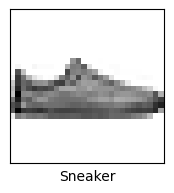

In [54]:
test_image_idx = 12
# get an online prediction
test_images2 = test_images[test_image_idx].reshape(1,28,28,1)
print(f"test_images shape: {test_images.shape}")
print(f"test_images2.shape: {test_images2.shape}")


prediction = np.argmax(model.predict(test_images2))
print(f"Local prediction: {class_names[prediction]}")

instances = test_images2.tolist()

response = endpoint.predict(
    instances=instances
)

remote_prediction = np.argmax(response.predictions)
print(f"Remote prediction: {class_names[remote_prediction]}")

plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[test_image_idx], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[test_image_idx]])


Note that in the above, when using the Vertex AI SDK, the numpy array is automatically serialized for you and it functions largely the same as if the model were running locally.

There is also a raw HTTP API you can use if you do not want to import the Vertex AI SDK in your application. See the following [link](https://cloud.google.com/vertex-ai/docs/predictions/get-online-predictions#raw-predict-request) for details and the sample [notebook](https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/prediction/get_started_with_raw_predict.ipynb).



## Clean up

Clean up. The most expensive costs here are associated with the  Vertex AI Model deployed to the endpoint, as these have compute resources backing them.

In [ ]:
delete_bucket = False
delete_model = False
undeploy_model = True
delete_endpoint = False


if undeploy_model:
  try:
    endpoint.undeploy_all()
  except Exception as e:
    print(e)

if delete_endpoint:
    try:
        endpoint.delete()
    except Exception as e:
        print(e)

if delete_model:
    try:
        vertex_model.delete()
    except Exception as e:
        print(e)

if delete_bucket or os.getenv("IS_TESTING"):
    ! gsutil rm -rf {BUCKET_URI}

INFO:google.cloud.aiplatform.models:Undeploying Endpoint model: projects/205512073711/locations/us-central1/endpoints/1546253248
INFO:google.cloud.aiplatform.models:Undeploy Endpoint model backing LRO: projects/205512073711/locations/us-central1/endpoints/1546253248/operations/3978222219653283840
INFO:google.cloud.aiplatform.models:Endpoint model undeployed. Resource name: projects/205512073711/locations/us-central1/endpoints/1546253248
INFO:google.cloud.aiplatform.models:Undeploying Endpoint model: projects/205512073711/locations/us-central1/endpoints/1546253248
INFO:google.cloud.aiplatform.models:Undeploy Endpoint model backing LRO: projects/205512073711/locations/us-central1/endpoints/1546253248/operations/986706167172431872
INFO:google.cloud.aiplatform.models:Endpoint model undeployed. Resource name: projects/205512073711/locations/us-central1/endpoints/1546253248
INFO:google.cloud.aiplatform.base:Deleting Endpoint : projects/205512073711/locations/us-central1/endpoints/1546253248
